In [1]:
import os
os.chdir("..")

In [2]:
import re
import json
import numpy as np
import pandas as pd
import yaml
import time
import glob

import matplotlib.pyplot as plt


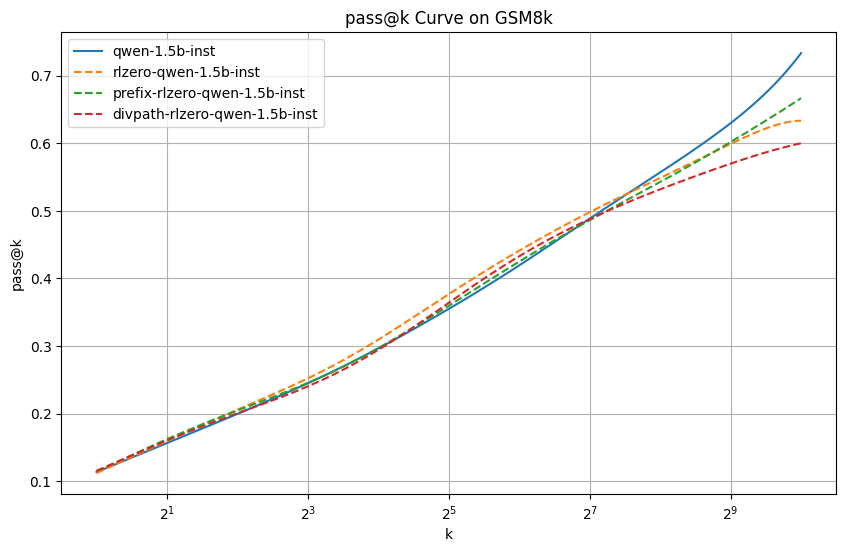

In [4]:
all_metrics = {}

with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.direct/sample_1/metrics.11.26,13:28.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/To/metrics.11.28,1:26.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst To'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/Let/metrics.11.28,1:15.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst Let'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/We/metrics.11.28,12:41.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst We'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/Given/metrics.11.28,12:41.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst Given'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.direct/sample_1/metrics.11.28,15:34.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-1.5b-inst'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.prefix/Let/metrics.11.28,1:14.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-1.5b-inst Let'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.prefix/To/metrics.11.28,1:14.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-1.5b-inst To'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.prefix/We/metrics.11.28,12:32.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-1.5b-inst We'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.prefix/Given/metrics.11.28,12:34.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-1.5b-inst Given'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-1.5b/prefixrlzero_100.direct/sample_1/metrics.11.28,15:34.json", encoding='utf-8') as f:
    all_metrics['prefix-rlzero-qwen-1.5b-inst'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/prefixrlzero_100.prefix/Let/metrics.11.28,12:11.json", encoding='utf-8') as f:
#     all_metrics['prefix-rlzero-qwen-1.5b-inst Let'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/prefixrlzero_100.prefix/To/metrics.11.28,12:11.json", encoding='utf-8') as f:
#     all_metrics['prefix-rlzero-qwen-1.5b-inst To'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/prefixrlzero_100.prefix/We/metrics.11.28,12:46.json", encoding='utf-8') as f:
#     all_metrics['prefix-rlzero-qwen-1.5b-inst We'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/prefixrlzero_100.prefix/Given/metrics.11.28,12:47.json", encoding='utf-8') as f:
#     all_metrics['prefix-rlzero-qwen-1.5b-inst Given'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-1.5b/divpathrl_100.direct/sample_1/metrics.11.29,3:25.json", encoding='utf-8') as f:
    all_metrics['divpath-rlzero-qwen-1.5b-inst'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    if 'rlzero' in model_name:
        plt.plot(ks, values, label=model_name, linestyle='--')
    else:
        plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on GSM8k')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()

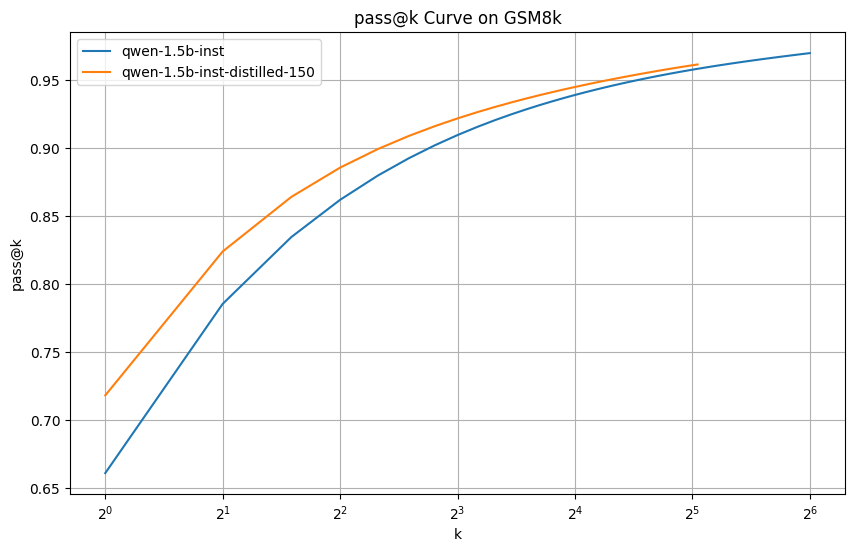

In [12]:
all_metrics = {}

with open("runs/default/gsm8k.qwen-1.5b-inst/direct/sample_2/metrics.11.22,21:34.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst'] = json.load(f)['overall']

# with open("runs/default/gsm8k.qwen-math-1.5b-inst/direct/sample_1/metrics.11.22,21:46.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst'] = json.load(f)['overall']

# with open("runs/default/gsm8k.gemma-3-1b-it/direct/sample_1/metrics.11.23,19:32.json", encoding='utf-8') as f:
#     all_metrics['gemma-3-1b-it'] = json.load(f)['overall']

# with open("runs/default/gsm8k.qwen-1.5b-inst/distilled-100.direct/sample_1/metrics.11.23,14:27.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-100'] = json.load(f)['overall']

with open("runs/default/gsm8k.qwen-1.5b-inst/distilled-150.direct/sample_1/metrics.11.23,14:22.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst-distilled-150'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on GSM8k')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()

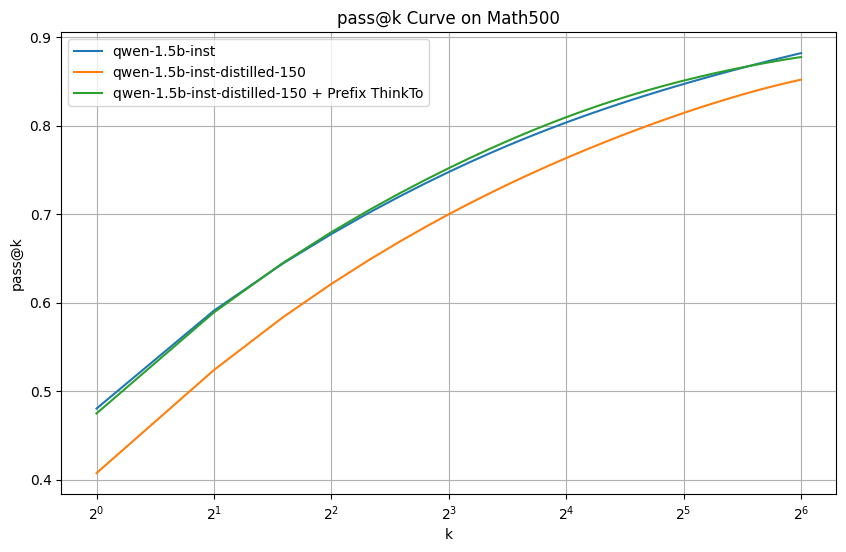

In [8]:
all_metrics = {}
with open("runs/default/math500.qwen-1.5b-inst/direct/sample_1/metrics.11.23,3:39.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst'] = json.load(f)['overall']

with open("runs/default/math500.qwen-1.5b-inst/distilled-150.direct/sample_1/metrics.11.23,3:40.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst-distilled-150'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.direct/sample_2/metrics.11.23,14:56.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 (max-token=10000)'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/To/metrics.11.23,4:7.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 + Prefix To'] = json.load(f)['overall']

with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/ThinkTo/metrics.11.23,15:19.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst-distilled-150 + Prefix ThinkTo'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on Math500')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()


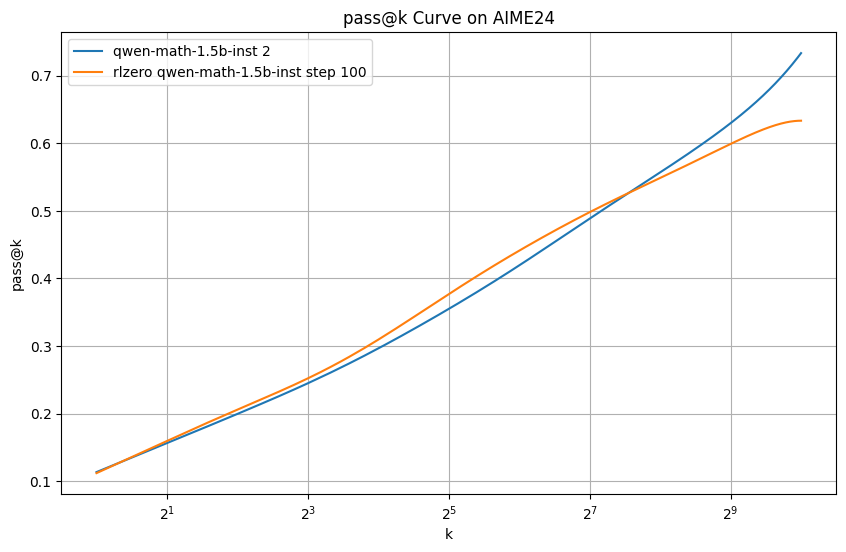

In [14]:
all_metrics = {}
# with open("runs/default/aime.qwen2.5-math-1.5b/base.direct/sample_1/metrics.11.24,13:57.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b'] = json.load(f)['overall']

# with open("runs/default/aime24.qwen2.5-math-1.5b/instruct.direct/sample_1/metrics.11.24,14:14.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst'] = json.load(f)['overall']

# with open("runs/default/aime24.qwen2.5-math-1.5b/instruct.direct/sample_1/metrics.11.26,2:47.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst 2'] = json.load(f)['overall']

# with open("runs/default/aime24.qwen2.5-math-1.5b/myrlzero_20.direct/sample_1/metrics.11.26,1:27.json", encoding='utf-8') as f:
#     all_metrics['rlzero qwen-math-1.5b-inst step 20'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-1.5b/instruct.divfirst/sample_1/metrics.11.24,18:54.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst div-first@16'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-1.5b/mot_distilled.direct/sample_1/metrics.11.24,15:11.json", encoding='utf-8') as f:
#     all_metrics['mot_distilled-qwen-math-1.5b-inst'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-1.5b/gsm8k_distilled.direct/sample_1/metrics.11.24,17:5.json", encoding='utf-8') as f:
#     all_metrics['gsm8k_distilled-qwen-math-1.5b-inst'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-1.5b/rlzero.direct/sample_1/metrics.11.24,16:38.json", encoding='utf-8') as f:
#     all_metrics['rlzero qwen-math-1.5b'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.direct/sample_2/metrics.11.23,14:56.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 (max-token=10000)'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/To/metrics.11.23,4:7.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 + Prefix To'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/ThinkTo/metrics.11.23,15:19.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 + Prefix ThinkTo'] = json.load(f)['overall']


# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/Anya/metrics.11.26,13:31.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst prefix Anya'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.prefix/Becky/metrics.11.26,13:31.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst prefix Becky'] = json.load(f)['overall']

# with open("runs/default/aime24.qwen2.5-math-1.5b/myrlzero_100.direct/sample_1/metrics.11.26,1:27.json", encoding='utf-8') as f:
#     all_metrics['rlzero qwen-math-1.5b-inst step 100'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.direct/sample_1/metrics.11.26,13:27.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-1.5b-inst'] = json.load(f)['overall']


with open("runs/v1/aime24.qwen2.5-math-1.5b/instruct.direct/sample_1/metrics.11.26,13:28.json", encoding='utf-8') as f:
    all_metrics['qwen-math-1.5b-inst 2'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_20.direct/sample_1/metrics.11.29,16:56.json", encoding='utf-8') as f:
#     all_metrics['rlzero qwen-math-1.5b-inst step 20'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-1.5b/myrlzero_100.direct/sample_1/metrics.11.28,15:34.json", encoding='utf-8') as f:
    all_metrics['rlzero qwen-math-1.5b-inst step 100'] = json.load(f)['overall']

# with open("runs/v1/aime24.qwen2.5-math-1.5b/divpathrl_100.direct/sample_1/metrics.11.29,3:25.json", encoding='utf-8') as f:
#     all_metrics['divpath-rlzero-qwen-1.5b-inst'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on AIME24')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()


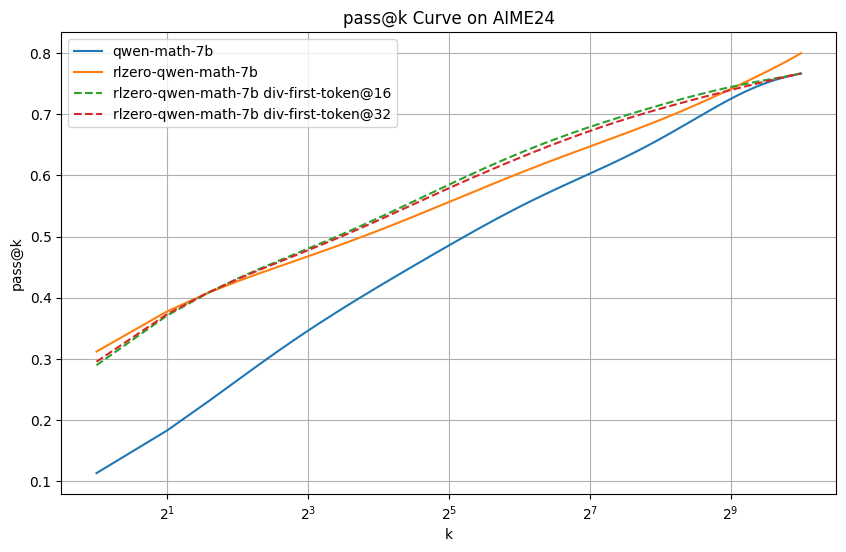

In [6]:
all_metrics = {}
with open("runs/v1/aime24.qwen2.5-math-7b/base.direct/sample_1/metrics.11.29,16:27.json", encoding='utf-8') as f:
    all_metrics['qwen-math-7b'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-7b/rlzero.direct/sample_1/metrics.11.29,16:27.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-7b/rlzero.divpath/sample_1/metrics.11.29,16:28.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b div-first-token@16'] = json.load(f)['overall']

with open("runs/v1/aime24.qwen2.5-math-7b/rlzero.divpath/sample_2/metrics.11.29,16:28.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b div-first-token@32'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-7b/base.divpath/sample_1/metrics.11.24,21:13.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-7b div-first-token@16'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name, linestyle='--' if 'div' in model_name else '-')

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on AIME24')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()


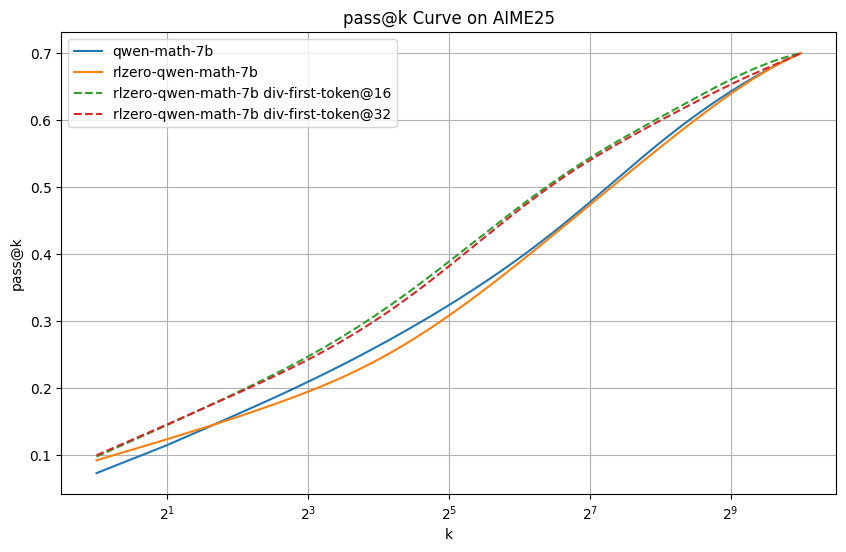

In [4]:
all_metrics = {}
with open("runs/default/aime25.qwen2.5-math-7b/base.direct/sample_1/metrics.11.25,14:18.json", encoding='utf-8') as f:
    all_metrics['qwen-math-7b'] = json.load(f)['overall']

with open("runs/default/aime25.qwen2.5-math-7b/rlzero.direct/sample_1/metrics.11.25,14:18.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b'] = json.load(f)['overall']

with open("runs/default/aime25.qwen2.5-math-7b/rlzero.divpath/sample_1/metrics.11.25,14:19.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b div-first-token@16'] = json.load(f)['overall']

with open("runs/default/aime25.qwen2.5-math-7b/rlzero.divpath/sample_2/metrics.11.25,14:19.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b div-first-token@32'] = json.load(f)['overall']

# with open("runs/default/aime.qwen2.5-math-7b/base.divpath/sample_1/metrics.11.24,21:13.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-7b div-first-token@16'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name, linestyle='--' if 'div' in model_name else '-')

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on AIME25')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()


In [4]:
# all_metrics = {}
# with open("runs/v1/imobench.qwen2.5-math-7b/base.direct/sample_1/metrics.12.15,16:5.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-7b'] = json.load(f)['overall']

# # with open("runs/default/imobench.qwen2.5-math-7b/rlzero.direct/sample_1/metrics.11.25,18:43.json", encoding='utf-8') as f:
# #     all_metrics['rlzero-qwen-math-7b'] = json.load(f)['overall']

# # with open("runs/default/imobench.qwen2.5-math-7b/rlzero.divpath/sample_1/metrics.11.25,18:44.json", encoding='utf-8') as f:
# #     all_metrics['rlzero-qwen-math-7b div-first-token@16'] = json.load(f)['overall']

# # with open("runs/default/imobench.qwen2.5-math-7b/rlzero.divpath/sample_2/metrics.11.25,18:44.json", encoding='utf-8') as f:
# #     all_metrics['rlzero-qwen-math-7b div-first-token@32'] = json.load(f)['overall']

# with open("vrevals/runs/v1/imobench.qwen2.5-math-7b/rlzero.direct/sample_1/metrics.12.15,16:6.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-7b div-first-token@16'] = json.load(f)['overall']

# plt.figure(figsize=(10,6))

# for model_name, metrics in all_metrics.items():
#     pass_at_k = metrics['pass_at_k']
#     ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
#     values = [pass_at_k[f'pass@{k}'] for k in ks]
#     plt.plot(ks, values, label=model_name, linestyle='--' if 'div' in model_name else '-')

# plt.xlabel('k')
# plt.ylabel('pass@k')
# plt.title('pass@k Curve on IMOBench-Answerbench (Subset 40) ')
# plt.xscale('log', base=2)
# plt.grid(True)
# plt.legend()
# plt.show()


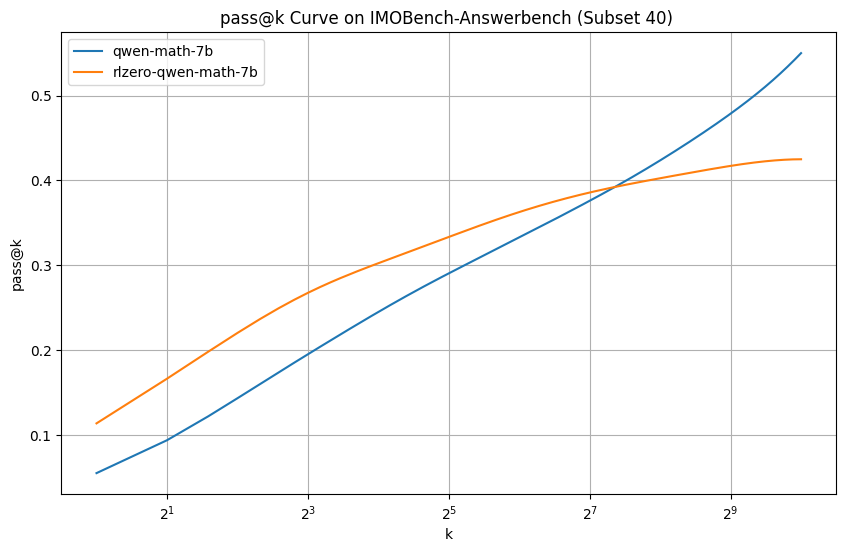

In [4]:
all_metrics = {}
with open("runs/v1/imobench.qwen2.5-math-7b/base.direct/sample_1/metrics.12.15,16:5.json", encoding='utf-8') as f:
    all_metrics['qwen-math-7b'] = json.load(f)['overall']

with open("runs/v1/imobench.qwen2.5-math-7b/rlzero.direct/sample_1/metrics.12.15,16:6.json", encoding='utf-8') as f:
    all_metrics['rlzero-qwen-math-7b'] = json.load(f)['overall']

# with open("runs/v1/imobench.qwen2.5-math-7b/rlzero.divpath/sample_1/metrics.12.9,10:25.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-math-7b div-first-token@16'] = json.load(f)['overall']

# with open("runs/v1/imobench.qwen2.5-math-7b/rlzero.divpath/sample_2/metrics.12.9,10:57.json", encoding='utf-8') as f:
#     all_metrics['rlzero-qwen-math-7b div-first-token@32'] = json.load(f)['overall']

# with open("runs/default/imobench.qwen2.5-math-7b/base.divpath/sample_1/metrics.11.25,18:47.json", encoding='utf-8') as f:
#     all_metrics['qwen-math-7b div-first-token@16'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, label=model_name, linestyle='--' if 'div' in model_name else '-')

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on IMOBench-Answerbench (Subset 40) ')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()
